# Banknote Authentication With Decision Tree Algorithm

# Step 1
Imports the necessary libraries

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Step 2
Loads the dataset and creates DataFrame with given column names

In [28]:
column_names = ["variance", "skewness", "curtosis", "entropy", "class"]
banknote_df = pd.read_csv("data_banknote_authentication.txt", header=None, names=column_names)
banknote_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Step 3
Visualizes the features of the dataset in groups of two

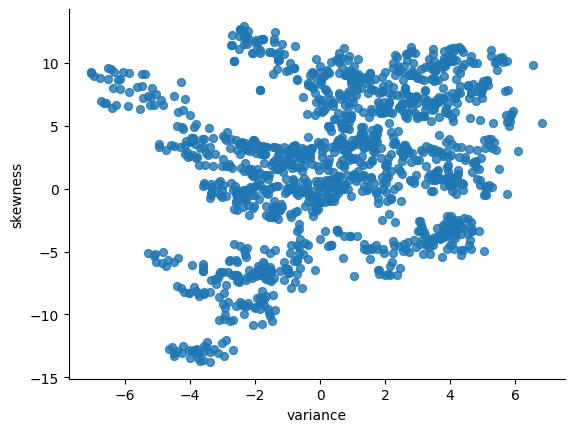

In [30]:
# @title variance vs skewness

from matplotlib import pyplot as plt
banknote_df.plot(kind='scatter', x='variance', y='skewness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

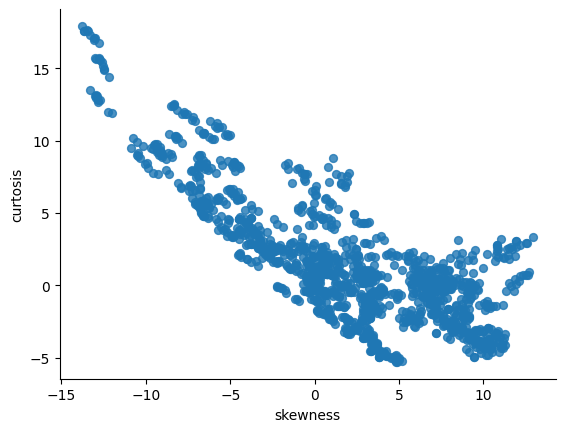

In [31]:
# @title skewness vs curtosis

from matplotlib import pyplot as plt
banknote_df.plot(kind='scatter', x='skewness', y='curtosis', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

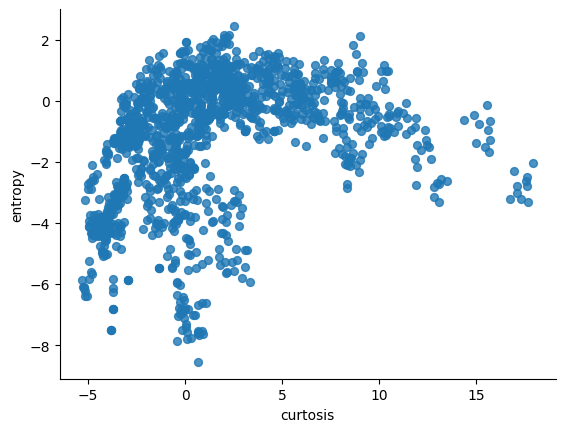

In [32]:
# @title curtosis vs entropy

from matplotlib import pyplot as plt
banknote_df.plot(kind='scatter', x='curtosis', y='entropy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Step 4
First splits the dataframe into class and features and then splits into train and test set

In [39]:
x = banknote_df.iloc[:, :-1]  # all columns except the last one (class)
y = banknote_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0,stratify=y)

x columns: ['variance', 'skewness', 'curtosis', 'entropy']
y name: class


# Step 5
Creates the decision tree model and trains it.

In [94]:
banknote_model = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2)
banknote_model.fit(x_train, y_train)
y_pred = banknote_model.predict(x_test)


# Step 6
Trains the model for the different parameteter values and views the effects of parameters.

In [97]:

criterions = ["gini", "entropy"]
depths = [None, 3, 5, 6, 9]
min_splits = [2, 5, 8]


results = []

for criterion in criterions:
    for max_depth in depths:
        for min_split in min_splits:
            banknote_model = DecisionTreeClassifier(
                criterion=criterion,
                max_depth=max_depth,
                min_samples_split=min_split,
                random_state=0
            )
            banknote_model.fit(x_train, y_train)
            y_pred = banknote_model.predict(x_test)
            acc = accuracy_score(y_test, y_pred)

            results.append({
                "Criterion": criterion,
                "max_depth": max_depth,
                "min_samples_split": min_split,
                "Accuracy": acc
            })

# Show results as a DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)

print(results_df)


   Criterion  max_depth  min_samples_split  Accuracy
24   entropy        6.0                  2  0.989091
15   entropy        NaN                  2  0.989091
27   entropy        9.0                  2  0.989091
21   entropy        5.0                  2  0.985455
22   entropy        5.0                  5  0.985455
23   entropy        5.0                  8  0.981818
25   entropy        6.0                  5  0.981818
16   entropy        NaN                  5  0.981818
28   entropy        9.0                  5  0.981818
17   entropy        NaN                  8  0.978182
29   entropy        9.0                  8  0.978182
26   entropy        6.0                  8  0.978182
0       gini        NaN                  2  0.967273
1       gini        NaN                  5  0.967273
13      gini        9.0                  5  0.967273
12      gini        9.0                  2  0.967273
11      gini        6.0                  8  0.967273
2       gini        NaN                  8  0.

# Step 7
Displays the confusion matrix and classification report

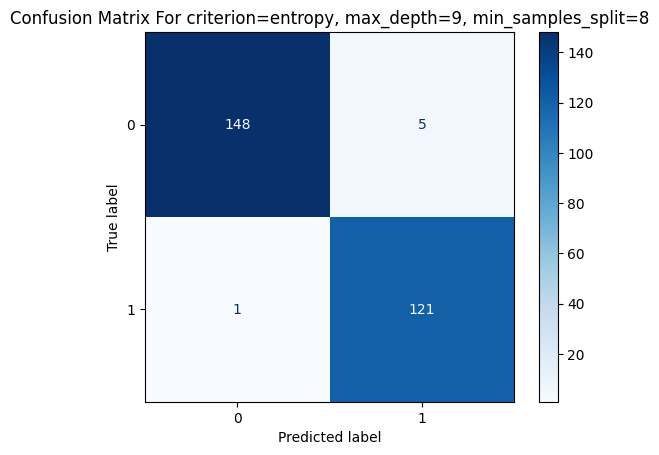



Classification Report For criterion=entropy, max_depth=9, min_samples_split=8:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       153
           1       0.96      0.99      0.98       122

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [91]:
# Display confusion matrix
confusion_matrix = mt.confusion_matrix(y_test, y_pred)
cm_display = mt.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=np.unique(y_test))
cm_display.plot(cmap='Blues')
plt.title(f"Confusion Matrix For criterion={banknote_model.criterion}, max_depth={banknote_model.max_depth}, min_samples_split={banknote_model.min_samples_split}")
plt.show()

print(f"\n\nClassification Report For criterion={banknote_model.criterion}, max_depth={banknote_model.max_depth}, min_samples_split={banknote_model.min_samples_split}:\n", classification_report(y_test, y_pred))

# Step 8
Visualizes the generated decision tree

[Text(0.4861111111111111, 0.9285714285714286, 'x[0] <= 0.274\nentropy = 0.991\nsamples = 1097\nvalue = [609, 488]'),
 Text(0.24074074074074073, 0.7857142857142857, 'x[1] <= 5.906\nentropy = 0.681\nsamples = 510\nvalue = [92, 418]'),
 Text(0.36342592592592593, 0.8571428571428572, 'True  '),
 Text(0.1111111111111111, 0.6428571428571429, 'x[2] <= 3.064\nentropy = 0.303\nsamples = 408\nvalue = [22, 386]'),
 Text(0.07407407407407407, 0.5, 'entropy = 0.0\nsamples = 231\nvalue = [0, 231]'),
 Text(0.14814814814814814, 0.5, 'x[1] <= -1.82\nentropy = 0.542\nsamples = 177\nvalue = [22, 155]'),
 Text(0.07407407407407407, 0.35714285714285715, 'x[0] <= -0.357\nentropy = 0.057\nsamples = 154\nvalue = [1, 153]'),
 Text(0.037037037037037035, 0.21428571428571427, 'entropy = 0.0\nsamples = 153\nvalue = [0, 153]'),
 Text(0.1111111111111111, 0.21428571428571427, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'x[2] <= 4.401\nentropy = 0.426\nsamples = 23\nvalue

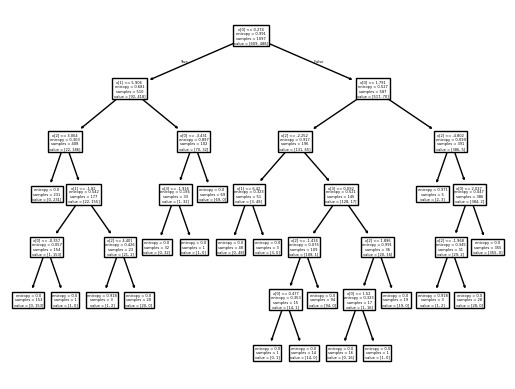

In [92]:
plot_tree(banknote_model)

# Step 9
Extracts and plots the feature importance from the trained model

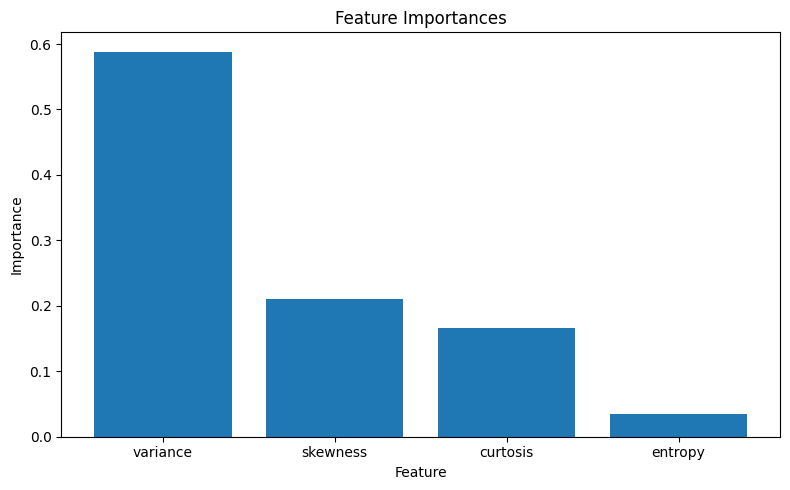

In [93]:

# Get feature importances from the model
importances = banknote_model.feature_importances_

# Get feature names from your dataframe
feature_names = x.columns

# Plot them
plt.figure(figsize=(8, 5))
plt.bar(feature_names, importances)
plt.title("Feature Importances")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()